Loading the data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
Training input data shape: (25000, 500)
Test input data shape: (25000, 500)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 138s 7ms/step - loss: 0.5522 - acc: 0.7332 - val_loss: 0.6481 - val_acc: 0.6934
Epoch 2/10
20000/20000 [==============================] - 137s 7ms/step - loss: 0.3408 - acc: 0.8648 - val_loss: 0.4076 - val_acc: 0.8372
Epoch 3/10
20000/20000 [==============================] - 136s 7ms/step - loss: 0.2603 - acc: 0.8993 - val_loss: 0.3050 - val_acc: 0.8814
Epoch 4/10
20000/20000 [==============================] - 137s 7ms/step - loss: 0.2308 - acc: 0.9108 - val_loss: 0.3691 - val_acc: 0.8632
Epoch 5/10
20000/20000 [==============================] - 137s 7ms/step - loss: 0.1965 - acc: 0.9267 - val_loss: 0.5565 - val_acc: 0.7956
Epoch 6/10
20000/20000 [==============================] - 136s 7ms/step - loss: 0.1750 - acc: 0.9377 - val_loss: 0.3084 - val_acc: 0.8698
Epoch 7/10
20000/20000 [==============================] - 136s 7ms/step - loss: 0.1551 - acc: 0.9466 - val_loss: 0.3258 - v

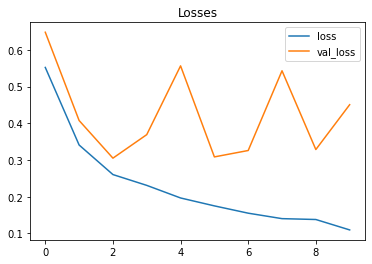

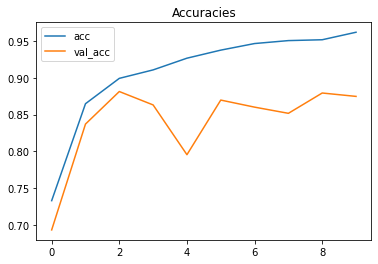

In [4]:
from keras.datasets import imdb
from keras import layers, models, optimizers, losses
from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

max_features = 10000
maxlen = 500
batch_size = 256

print('Loading the data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')

x_train = pad_sequences(x_train, maxlen = maxlen)
x_test = pad_sequences(x_test, maxlen = maxlen)
print('Training input data shape:', x_train.shape)
print('Test input data shape:', x_test.shape)
# Now we can create our model
model = models.Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation = 'sigmoid'))

# compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(),
              metrics=['acc'])

r = model.fit(x_train, y_train,
              validation_split = .2,
              epochs = 10,
              batch_size=batch_size)

plt.title('Losses')
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.title('Accuracies')
plt.plot(r.history['acc'], label = 'acc')
plt.plot(r.history['val_acc'], label = 'val_acc')
plt.legend()
plt.show()